## Laboratório 06 : Resolução Numérica de EDO's - Equações Diferenciais Ordinárias

O Método de Euler é uma das técnicas numéricas mais simples e antigas para resolver equações diferenciais ordinárias (EDOs) com um dado valor inicial (PVI - Problema do Valor Inicial). Ele aproxima a solução usando a ideia de que, próximo a um ponto, a função e sua reta tangente têm quase a mesma inclinação (o mesmo valor). Seja uma equação diferencial da forma:
$$
\frac{dy}{dt} = f\left(t,y\right)
$$
com condição inicial $y(t_0) = y_0,$ o **Método de Euler** estima o valor de $y$ em $t_1 = t_0 + \Delta t$ (onde $\Delta t$  equivale ao tamanho do passo),
$$
y({t_1}) = y({t_0}) + \Delta t.f\left(t_0,y_0\right)
$$
Este porcesso se repete iterativamente para aproximar a solução em um intervalo. O método de Euler é um método de primeira ordem, portanto o erro local por passo é proporcional a $\Delta t$.

1. Pontos chaves:
* É explícito e simples de implementar.
* A precisão depende do tamanho do passo $\Delta t$, um passo menor produz maior precisão, mas requer mais cálculos.
* Serve como base para soluções numéricas mais avançadas.

**Exemplo 01:**
Considere a seguinte EDO:
$$
\frac{df}{dt} = e^{-t}
$$
com condições iniciais $f(0) = -1,$ considere o intervalo de tempo $t \in [0\,,\,1]$, com $\Delta t = 0,1$.

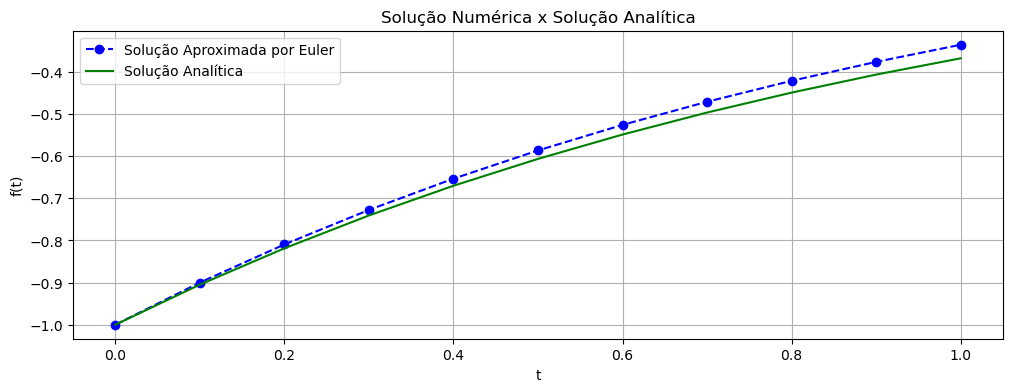

t = 0.00, y ≈ -1.0000, Sa ≈ -1.0000
t = 0.10, y ≈ -0.9000, Sa ≈ -0.9048
t = 0.20, y ≈ -0.8095, Sa ≈ -0.8187
t = 0.30, y ≈ -0.7276, Sa ≈ -0.7408
t = 0.40, y ≈ -0.6536, Sa ≈ -0.6703
t = 0.50, y ≈ -0.5865, Sa ≈ -0.6065
t = 0.60, y ≈ -0.5259, Sa ≈ -0.5488
t = 0.70, y ≈ -0.4710, Sa ≈ -0.4966
t = 0.80, y ≈ -0.4213, Sa ≈ -0.4493
t = 0.90, y ≈ -0.3764, Sa ≈ -0.4066
t = 1.00, y ≈ -0.3357, Sa ≈ -0.3679


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Defina e EDO dy/dt = f(t, y)
def f(t, y):
    return np.exp(-t)
   
# Condições Iniciais
t0 = 0
tf = 1
y0 = -1
dt = 0.1
t = np.arange(t0, tf + dt, dt)
y = np.zeros(len(t))
y[0] = y0

# Método de Euler 
for i in range(len(t) - 1):
    y[i + 1] = y[i] + dt * f(t[i], y[i])

# Solução Analítica para comparação
Sa = -np.exp(-t)

plt.figure(figsize = (12,4))
plt.plot(t, y, 'bo--', label='Solução Aproximada por Euler')
plt.plot(t, Sa, 'g-', label='Solução Analítica')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title("Solução Numérica x Solução Analítica")
plt.legend()
plt.grid()
plt.show()

for t, y, Sa in zip(t, y, Sa):
    print(f"t = {t:.2f}, y ≈ {y:.4f}, Sa ≈ {Sa:.4f}")


**Exemplo 02 :** As equações de Lotka-Volterra (também conhecidas como equações predador-presa) modelam a interação entre duas espécies, tais como:

* Uma população de presas (por exemplo, coelhos).
* Uma população de predadores (por exemplo, raposas).

O modelo é dado pelo sistema de EDOs:
$$
\left\{\begin{matrix}
\dot{x} = \alpha x - \beta xy \\
\dot{y} = \delta xy - \gamma y 
\end{matrix}\right.
$$
onde:
* $x(t)$ representa a população de presas no intante de tempo $t$,
* $y(t)$ a população de predadores no intante de tempo $t$,
* $\alpha$ a taxa de crescimento das presas,
* $\beta$ o coeficiente de predadores,
* $\gamma$ a taxa de mortandade dos predadores,
* $\delta$ a taxa de reprodução de predadores por presa ingerida.

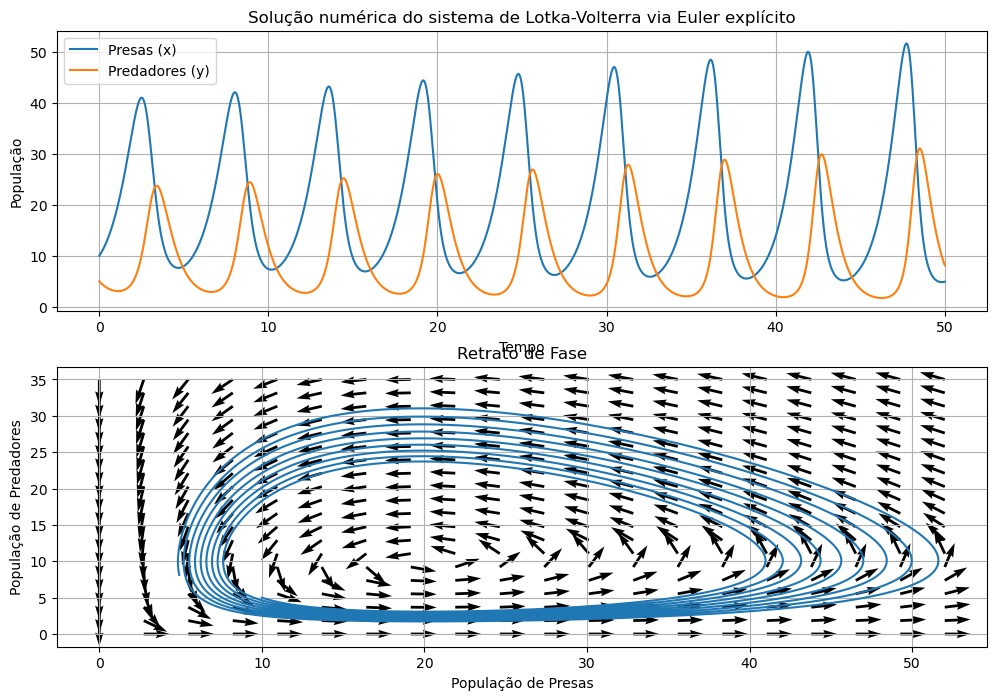

In [4]:
# Parâmetros do modelo
alpha = 1.0   # taxa de crescimento das presas
beta = 0.1    # taxa de predadores
gamma = 1.5   # taxa de mortalidade dos predadores
delta = 0.075 # taxa de crescimento dos predadores por predação

#alpha = 1.1   # taxa de crescimento das presas
#beta = 0.4    # taxa de predadores
#gamma = 0.4   # taxa de mortalidade dos predadores
#delta = 0.1 # taxa de crescimento dos predadores por predação

# Condições iniciais
x0 = 10  # população inicial de presas
y0 = 5   # população inicial de predadores

# Parâmetros da simulação
T = 50          # tempo total
dt = 0.01       # passo temporal
N = int(T/dt)   # número de passos

# Vetores para armazenar as soluções
t = np.linspace(0, T, N)
x = np.zeros(N)
y = np.zeros(N)

x[0] = x0
y[0] = y0

# Método de Euler explícito
for n in range(N-1):
    dx = alpha * x[n] - beta * x[n] * y[n]
    dy = delta * x[n] * y[n] - gamma * y[n]
    x[n+1] = x[n] + dt * dx
    y[n+1] = y[n] + dt * dy

plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.plot(t, x, label='Presas (x)')
plt.plot(t, y, label='Predadores (y)')
plt.title('Solução numérica do sistema de Lotka-Volterra via Euler explícito')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(x, y)
X_grid, Y_grid = np.meshgrid(np.linspace(0, T+2, 20),
                             np.linspace(0, 35, 20))
U = alpha * X_grid - beta * X_grid * Y_grid
V = delta * X_grid * Y_grid - gamma * Y_grid
magnitude = np.sqrt(U**2 + V**2)
U_norm = U / (magnitude + 1e-18)
V_norm = V / (magnitude + 1e-18)
plt.quiver(X_grid, Y_grid, U_norm, V_norm, angles='xy')
plt.xlabel('População de Presas')
plt.ylabel('População de Predadores')
plt.title('Retrato de Fase')
plt.grid()

plt.show()

**Exemplo 03 :** Para modelar o movimento de um pêndulo simples (sem atrito, sem força motriz). Considere
* Uma massa presa a uma haste sem massa de comprimento $L$.
* Oscilando sob a ação da gravidade.

Portanto, a equação de movimento (via leis de Newton) é:
$$
\frac{d^2\theta}{dt^2} = -\frac{g}{L}sen(\theta)
$$
onde $\theta(t)$ corresponde a velocidade angular do pêndulo (em radianos) e, $g$ a aceleração da gravidade. Para simplificar iremos adotar $g/L = 1$.
Assim,
$$
\frac{d^2\theta}{dt^2} = -sen(\theta)
$$
que pode ser simplifada via Sistema de EDO's. Ou seja,
$$
\left\{\begin{matrix}
\dot{\theta} = \omega \\
\dot{\omega} = -sen(\theta) 
\end{matrix}\right.
$$

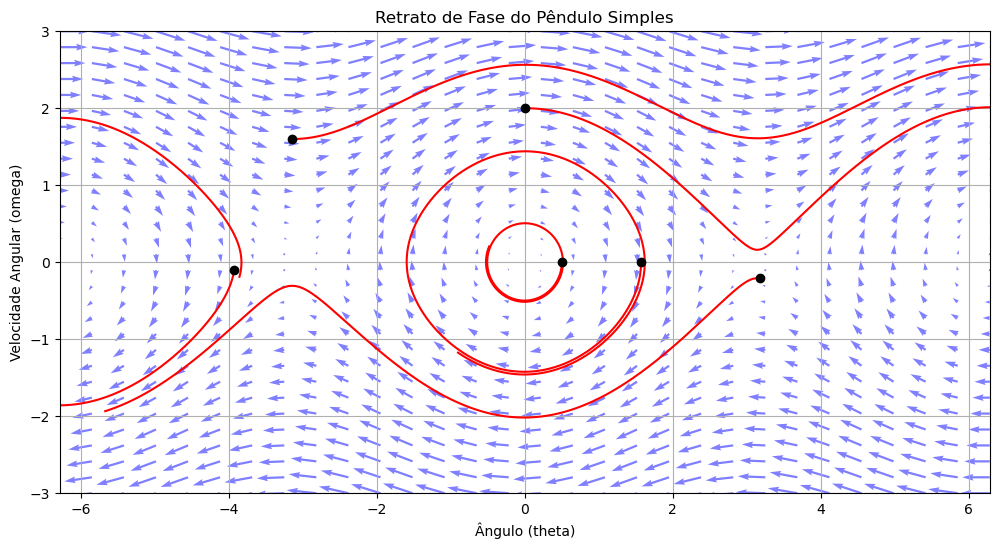

In [6]:
def pendulo(y):
    theta, omega = y
    return np.array([omega, -np.sin(theta)])

def metodo_euler(sys, y0, t_span):
    n_steps = len(t_span)
    y = np.zeros((n_steps, len(y0)))
    y[0] = y0
    dt = t_span[1] - t_span[0]
    
    for i in range(n_steps - 1):
        dydt = sys(y[i])
        y[i + 1] = y[i] + dt * dydt
        
    return y

theta = np.linspace(-2 * np.pi, 2 * np.pi, 30)
omega = np.linspace(-3, 3, 30)
Theta, Omega = np.meshgrid(theta, omega)

dTheta_dt = np.zeros_like(Theta)
dOmega_dt = np.zeros_like(Omega)

for i in range(Theta.shape[0]):
    for j in range(Theta.shape[1]):
        dydt = pendulo([Theta[i, j], Omega[i, j]])
        dTheta_dt[i, j] = dydt[0]
        dOmega_dt[i, j] = dydt[1]

plt.figure(figsize=(12, 6))
plt.quiver(Theta, Omega, dTheta_dt, dOmega_dt, color='blue', alpha=0.5)

cond_iniciais = [
    [0.5, 0],
    [np.pi/2, 0],
    [0, 2],
    [-np.pi, 1.6],
    [-1.25*np.pi, -0.1],
    [1.01*np.pi, -0.21]
]

t_span = np.linspace(0, 10, 1000)

for y0 in cond_iniciais:
    sol = metodo_euler(pendulo, y0, t_span)
    plt.plot(sol[:, 0], sol[:, 1], 'r-', linewidth=1.5)
    plt.plot(y0[0], y0[1], 'ko', markersize=6, label='Condições Iniciais' if y0 == cond_iniciais[0] else "")
plt.xlabel('Ângulo (theta)')
plt.ylabel('Velocidade Angular (omega)')
plt.title('Retrato de Fase do Pêndulo Simples')
plt.grid()
plt.xlim(theta.min(), theta.max())
plt.ylim(omega.min(), omega.max())
plt.show()


### Exercícios:
1. Considere um sistema massa-mola-amortecedor, consistindo de 2 massas conectadas em série com duas molas e dois amortecedores, decrito pelas seguintes variáveis de estado:
* $x_1(t)$ = deslocamento da massa 01;
* $x_2(t)$ = deslocamento da massa 02;
* $v_1(t) = \frac{dx_1}{dt}$ = velocidade da massa 01;
* $v_2(t) = \frac{dx_2}{dt}$ = velocidade da massa 02.

Definindo o seguinte vetor de estados:
$$
\mathbf{y} = 
\begin{bmatrix}
x_1 \\ v_1 \\ x_2 \\ v_2
\end{bmatrix}
$$
Aplicando a segunda lei de Newton para cada massa temos:
$$
m_1 \frac{d^2 x_1}{dt^2} 
= -k_1 x_1 - c_1 \frac{dx_1}{dt} + k_2 (x_2 - x_1) + c_2 \left(\frac{dx_2}{dt} - \frac{dx_1}{dt}\right)
$$
$$
m_2 \frac{d^2 x_2}{dt^2} 
= -k_2 (x_2 - x_1) - c_2 \left(\frac{dx_2}{dt} - \frac{dx_1}{dt}\right)
$$
Considerando $m_1 = m_2 = 1$, $k_1 = 10$, $k_2 = 15$, $c_1 = 0,5$ e $c_2 = 0,7$. Escreva as equações como um sistema de EDO's de primeira ordem, resolva-o via método de Euler e apresente os gráficos temporais e os retratos de fase, com as seguintes condições iniciais: $y_0 = [0.1, 0.0, -0.1, 0.0]$.


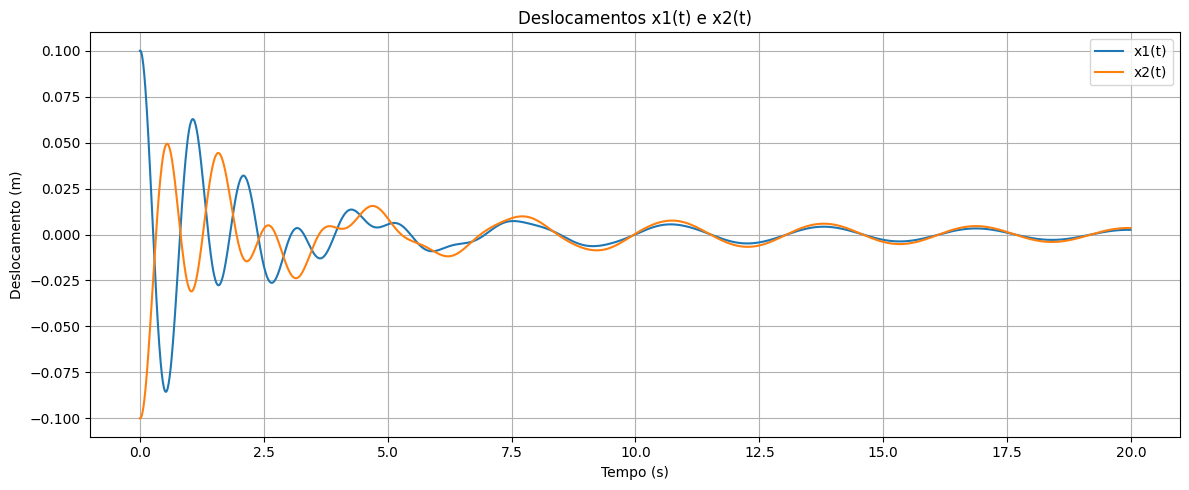

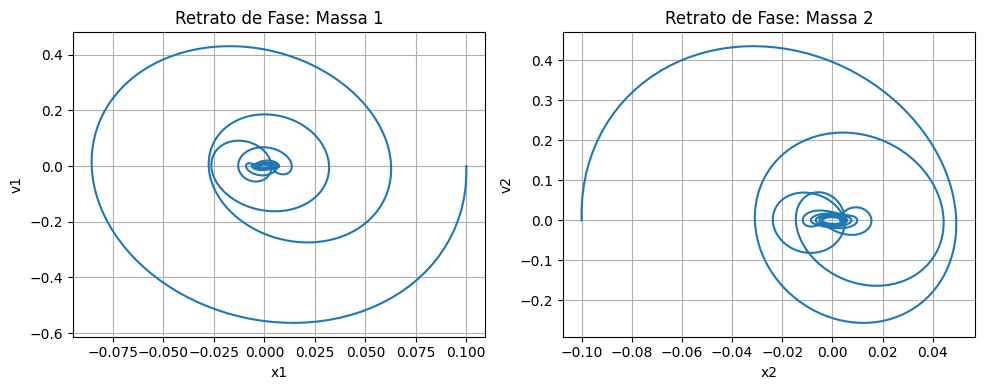

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sistema
m1 = m2 = 1.0
k1 = 10.0
k2 = 15.0
c1 = 0.5
c2 = 0.7

# Condições iniciais: [x1, v1, x2, v2]
y0 = np.array([0.1, 0.0, -0.1, 0.0])

# Tempo de simulação
dt = 0.01
t_final = 20
t = np.arange(0, t_final, dt)

# Inicializando vetor de estados
y = np.zeros((len(t), 4))
y[0] = y0

# Função para derivada do vetor de estado
def dydt(y):
    x1, v1, x2, v2 = y
    dx1dt = v1
    dv1dt = ( -k1*x1 - c1*v1 + k2*(x2 - x1) + c2*(v2 - v1) ) / m1
    dx2dt = v2
    dv2dt = ( -k2*(x2 - x1) - c2*(v2 - v1) ) / m2
    return np.array([dx1dt, dv1dt, dx2dt, dv2dt])

# Integração por método de Euler
for i in range(1, len(t)):
    y[i] = y[i-1] + dt * dydt(y[i-1])

# Extraindo variáveis para gráfico
x1 = y[:, 0]
v1 = y[:, 1]
x2 = y[:, 2]
v2 = y[:, 3]

# Gráficos temporais
plt.figure(figsize=(12, 5))
plt.plot(t, x1, label='x1(t)')
plt.plot(t, x2, label='x2(t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Deslocamento (m)')
plt.title('Deslocamentos x1(t) e x2(t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Retratos de fase
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x1, v1)
plt.xlabel('x1')
plt.ylabel('v1')
plt.title('Retrato de Fase: Massa 1')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x2, v2)
plt.xlabel('x2')
plt.ylabel('v2')
plt.title('Retrato de Fase: Massa 2')
plt.grid(True)

plt.tight_layout()
plt.show()


2. Para simular um circuito RLC série, você precisará resolver as equações diferenciais que regem o circuito. Um circuito RLC normalmente consiste em um resistor (R), um indutor (L) e um capacitor (C) conectados em série, e seu comportamento pode ser descrito pela seguinte equação diferencial:

$$
V_f(t) - Ri_c(t) - L \frac{di_c(t)}{dt} - \frac{1}{C}\int i_c(t)dt = 0
$$
considerando $R = 1 \ohm$, $L = 1H$, $C = 1F$ ligados a uma fonte de $1,5V$ e condições iniciais $I[0] = 0,1A$ e $V_c[0] = 0,5V$. Escreva as equações como um sistema de EDO's de primeira ordem, resolva-o via método de Euler e apresente os gráficos temporais e os retratos de fase, da voltagem em função da corrente no capacitor.

3. Um paraquedista de massa $78,6\,kg$ pula de uma balão de ar quente parado. Deseja-se calcular a velocidade anterior à abertura do paraquedas. Sabendo que o coeficiente de arrasto é de $15,5\frac{kg}{s}$. Uma vez definido o problema é necessário (se possível) a modelagem matemática do mesmo. Ou seja,

\begin{equation}
\sum F = m.a \rightarrow m. \frac{dv}{dt} \rightarrow F_d - F_v = m. \frac{dv}{dt} \rightarrow g - \frac{c}{m}v = \frac{dv}{dt}
\end{equation}
Resolva a EDO via método de Euler e apresente o resultado numa tabela e via gráfico.

4. Determine a solução aproximada para a seguinte EDO,

$$
y^{\prime} = 0.1 \sqrt{y} + 0.4x^2
$$

no intervalo $[2\,,\,2.5]$ e $n = 100$.